# European electricity grid

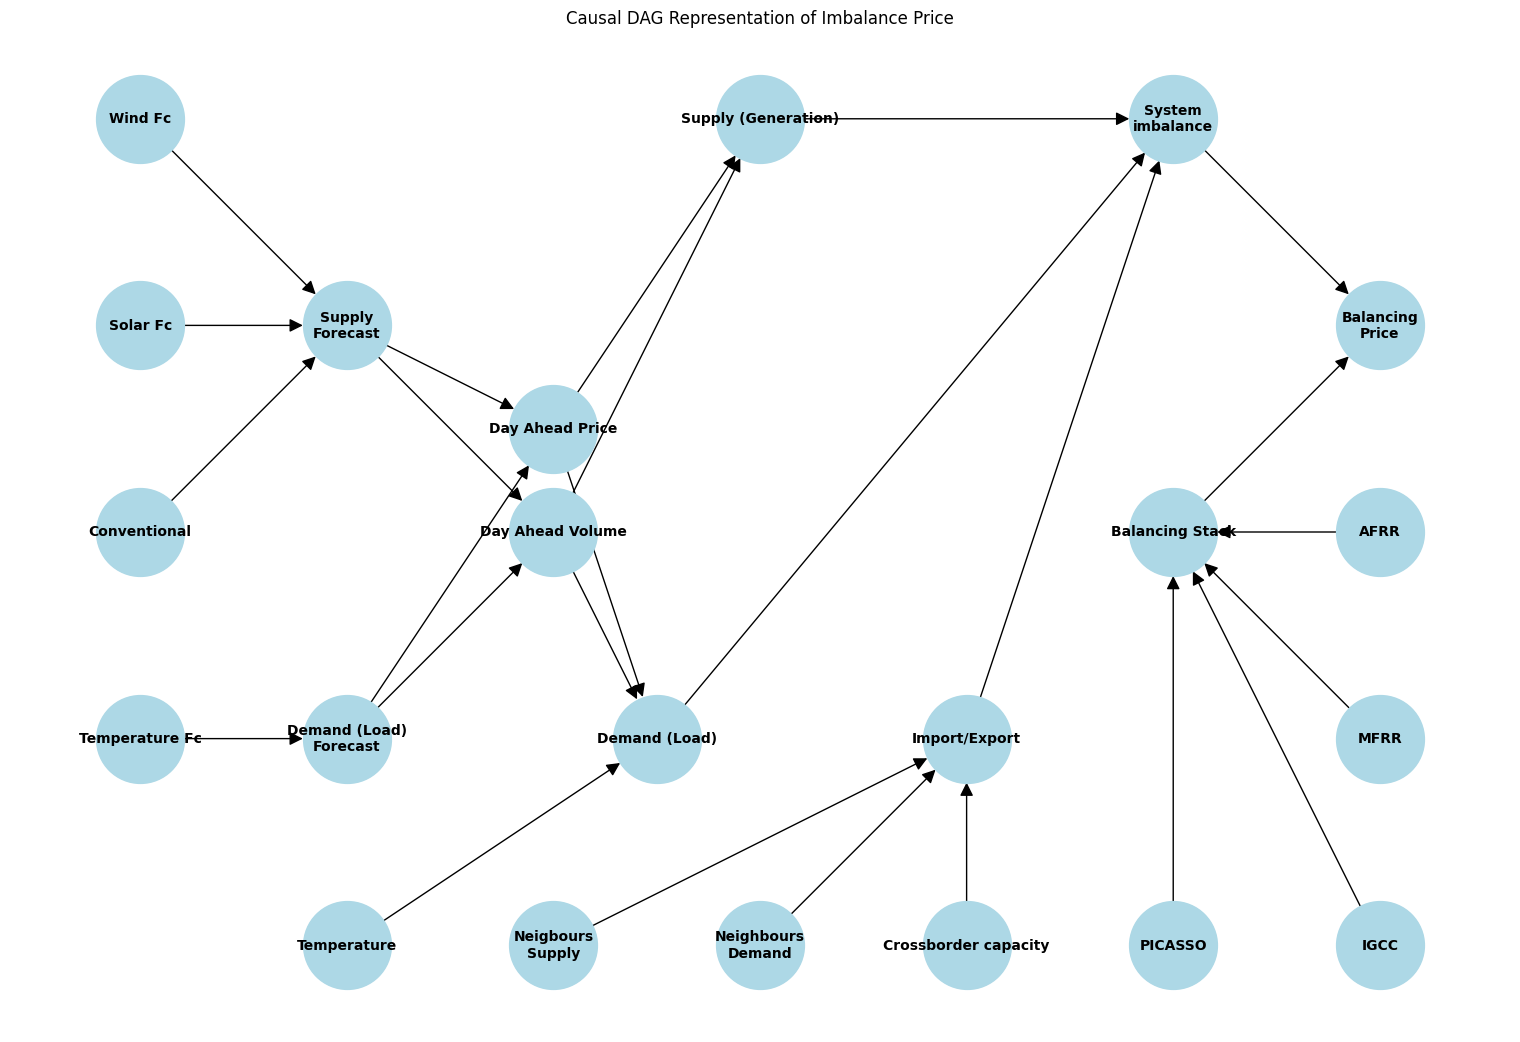

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

nodes = [
    "Wind Fc", "Solar Fc", "Conventional", "Temperature Fc",
    "Supply\nForecast",  "Demand (Load)\nForecast","Day Ahead Price", "Day Ahead Volume",
    "Supply (Generation)", "Demand (Load)", "Temperature",
    "System\nimbalance", "Balancing\nPrice", "Balancing Stack",
    "Import/Export", "Crossborder capacity", "AFRR", "MFRR",
    "IGCC","PICASSO", "Neighbours\nDemand", "Neigbours\nSupply"
]


G.add_nodes_from(nodes)


edges = [
    ("Wind Fc", "Supply\nForecast"),
    ("Solar Fc", "Supply\nForecast"),
    ("Conventional", "Supply\nForecast"),
    ("Temperature Fc",  "Demand (Load)\nForecast",),
    ( "Demand (Load)\nForecast", "Day Ahead Volume"),
    ("Supply\nForecast", "Day Ahead Volume"),
    ("Demand (Load)\nForecast", "Day Ahead Volume"),
    ("Demand (Load)\nForecast", "Day Ahead Price"),
    ("Supply\nForecast", "Day Ahead Price"),
    ("Day Ahead Volume", "Supply (Generation)"),
    ("Day Ahead Volume", "Demand (Load)"),
    ("Supply (Generation)", "System\nimbalance"),
    ("Day Ahead Price", "Supply (Generation)"),
    ("Day Ahead Price", "Demand (Load)"),
   
   
    ("Demand (Load)", "System\nimbalance"),
    ("Temperature", "Demand (Load)"),
    ("System\nimbalance", "Balancing\nPrice"),
    ("Balancing Stack", "Balancing\nPrice"),
    ("Import/Export", "System\nimbalance"),
    ("Crossborder capacity", "Import/Export"),
    ("Neighbours\nDemand", "Import/Export"),
    ("Neigbours\nSupply", "Import/Export"),

    ("AFRR", "Balancing Stack"),
    ("MFRR", "Balancing Stack"),
    ("IGCC", "Balancing Stack"),
    ("PICASSO", "Balancing Stack")
]

G.add_edges_from(edges)

pos = {
    "Wind Fc": (-5, 2),
    "Solar Fc": (-5, 1),
    "Conventional": (-5, 0),
    "Supply\nForecast": (-3, 1),
    "Demand (Load)\nForecast": (-3, -1),
    "Day Ahead Price": (-1, 0.5),
    "Day Ahead Volume": (-1, 0),
    "Supply (Generation)": (1, 2),
    "System\nimbalance": (5, 2),
    "Demand (Load)": (0, -1),
    "Temperature Fc": (-5, -1),
    "Temperature": (-3, -2),
    "Balancing\nPrice": (7, 1),
    "Balancing Stack": (5, 0),
    "Import/Export": (3, -1),
    "Crossborder capacity": (3, -2),
    "AFRR": (7, 0),
    "MFRR": (7, -1),
    "IGCC": (7, -2),
    "PICASSO": (5, -2),
    "Neighbours\nDemand": (1, -2),
    "Neigbours\nSupply": (-1, -2)
}

plt.figure(figsize=(15, 10))
nx.draw(
    G, pos, with_labels=True, node_size=4000,
    node_color='lightblue', font_size=10, font_weight='bold',
    arrowsize=20, arrowstyle='-|>'
)

plt.title("Causal DAG Representation of Imbalance Price")
plt.show()


European he European electricity grid relies on a delicate balance between supply and demand. Electricity generation forecasts, including wind, solar, and conventional sources, feed into the supply forecast. Concurrently, forecasts of electricity consumption, strongly influenced by temperature predictions, determine the demand forecast. These forecasts converge into the day-ahead market, where electricity for the next day is traded. The day-ahead market sets both a price and volume, establishing the initial plan for electricity generation (supply) and consumption (load).

However, the actual electricity supply and demand often deviate from forecasts, creating a system imbalance. This imbalance emerges when generation (supply) doesn't precisely match consumption (demand). To correct this imbalance and ensure grid stability, system operators utilize the balancing market. Here, flexibility providers, through mechanisms such as Automatic Frequency Restoration Reserve (AFRR), Manual Frequency Restoration Reserve (MFRR), and coordinated platforms like IGCC and PICASSO, offer balancing capacity, forming the balancing stack. The cost to activate these balancing mechanisms determines the balancing price, also known as the imbalance price.

Extreme imbalance prices can significantly affect market participants by imposing high financial risks and signaling scarcity or surplus conditions within the grid. Identifying the origins of extreme imbalance prices helps grid operators, producers, and traders improve forecasting, hedging, and operational decisions, ensuring economic efficiency and grid stability. Accurate attribution of imbalance sources, such as forecasting errors, renewable volatility, or unexpected demand fluctuations, enables proactive management and strategic investments in flexibility and infrastructure.

Lastly, beyond the day-ahead market, adjustments continue in the intraday market, allowing market participants to correct their positions closer to real-time operation. This market serves as an essential intermediate step, smoothing discrepancies between forecasted and actual conditions, thereby mitigating potential imbalance costs.

**The task of this assignment is to use Root Cause Analysis (RCA) to determine what drives high imbalance prices.**

# Tasks

1. Download data
    * [tinyurl.com/rca-data](http://tinyurl.com/rca-data): he data from electricity grid and marked
    * [https://tinyurl.com/rca-data-cols](https://tinyurl.com/rca-data-cols): column type hints
1. Perform Exploratory Data Analysis on the data
1. Find anomal balancig prices (column balancing_prices_df_IMBALANCE PRICE CALCULATED (EUR/MWh)). Use **absolute value** as we are interested in high prices only.
1. Use [https://github.com/profitopsai/ProRCA](ProRCA)  package to find anomal balancig prices, compare with your own results.
1. Perform RCA using ProRCA to analyze high imbalance prices.
1. Create short report of your resuls explaining overal results and interesting instances.
1. Use any causal discovery method (i.e. [https://www.pywhy.org/dowhy/v0.10/example_notebooks/dowhy_causal_discovery_example.html])  to create your own version of the causal DAG
1. Run  ProRCA on your causal DAG
1. Compare resuls between provided and own causal DAG.

